# 단순 선형 회귀

## #01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

## #02. 데이터셋 준비하기

In [2]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #03. 데이터 전처리

### 결측치 확인

In [3]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

## #04. 탐색적 데이터 분석

### 기본통계 확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인

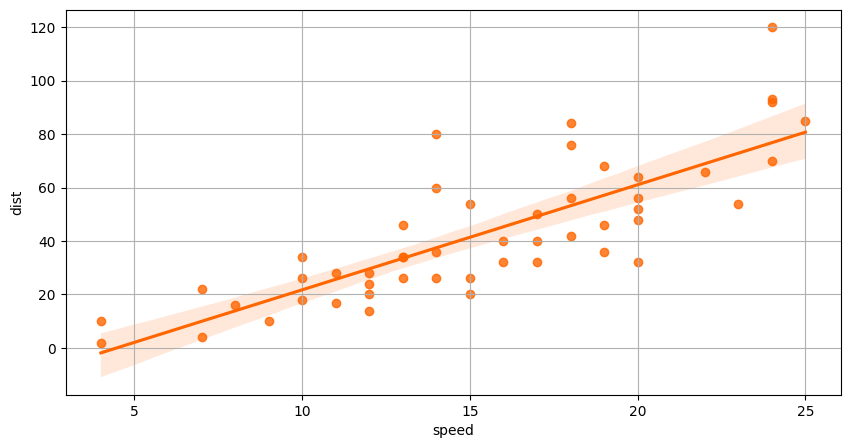

In [5]:
plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

> 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

## #05. 데이터셋 분할하기

### 1. 랜덤시드 고정

In [6]:
np.random.seed(777)

### 2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [7]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터 크기:", x.shape, "/ 레이블 크기:", y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50,)


### 3. 훈련 데이터와 검증 데이터로 분할

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


## #06. 모델 개발

### 1. 모델 정의

In [9]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [10]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
2/2 [==============================] - 1s 190ms/step - loss: 3053.8606 - mae: 47.8485 - val_loss: 2140.6580 - val_mae: 40.7108
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 3029.6089 - mae: 47.6282 - val_loss: 2122.9062 - val_mae: 40.5169
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 3005.2566 - mae: 47.4090 - val_loss: 2104.8989 - val_mae: 40.3193
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 2980.6531 - mae: 47.1876 - val_loss: 2086.5972 - val_mae: 40.1174
Epoch 5/500
2/2 [==============================] - 0s 40ms/step - loss: 2956.2646 - mae: 46.9631 - val_loss: 2068.1787 - val_mae: 39.9133
Epoch 6/500
2/2 [==============================] - 0s 32ms/step - loss: 2932.3367 - mae: 46.7402 - val_loss: 2050.1475 - val_mae: 39.7124
Epoch 7/500
2/2 [==============================] - 0s 38ms/step - loss: 2907.0686 - mae: 46.5115 - val_loss: 2032.3152 - val_mae: 39.5128
Epoch 8/500
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,3053.860596,47.848492,2140.657959,40.710827
2,3029.608887,47.628155,2122.906250,40.516911
3,3005.256592,47.409012,2104.898926,40.319275
4,2980.653076,47.187557,2086.597168,40.117428
5,2956.264648,46.963058,2068.178711,39.913284
...,...,...,...,...
496,270.527466,12.992275,251.217041,13.128939
497,270.553741,12.982854,250.893417,13.106802
498,270.528137,12.972088,250.615707,13.087585


## 7) 학습 결과 평가

### 1. 학습 결과 시각화

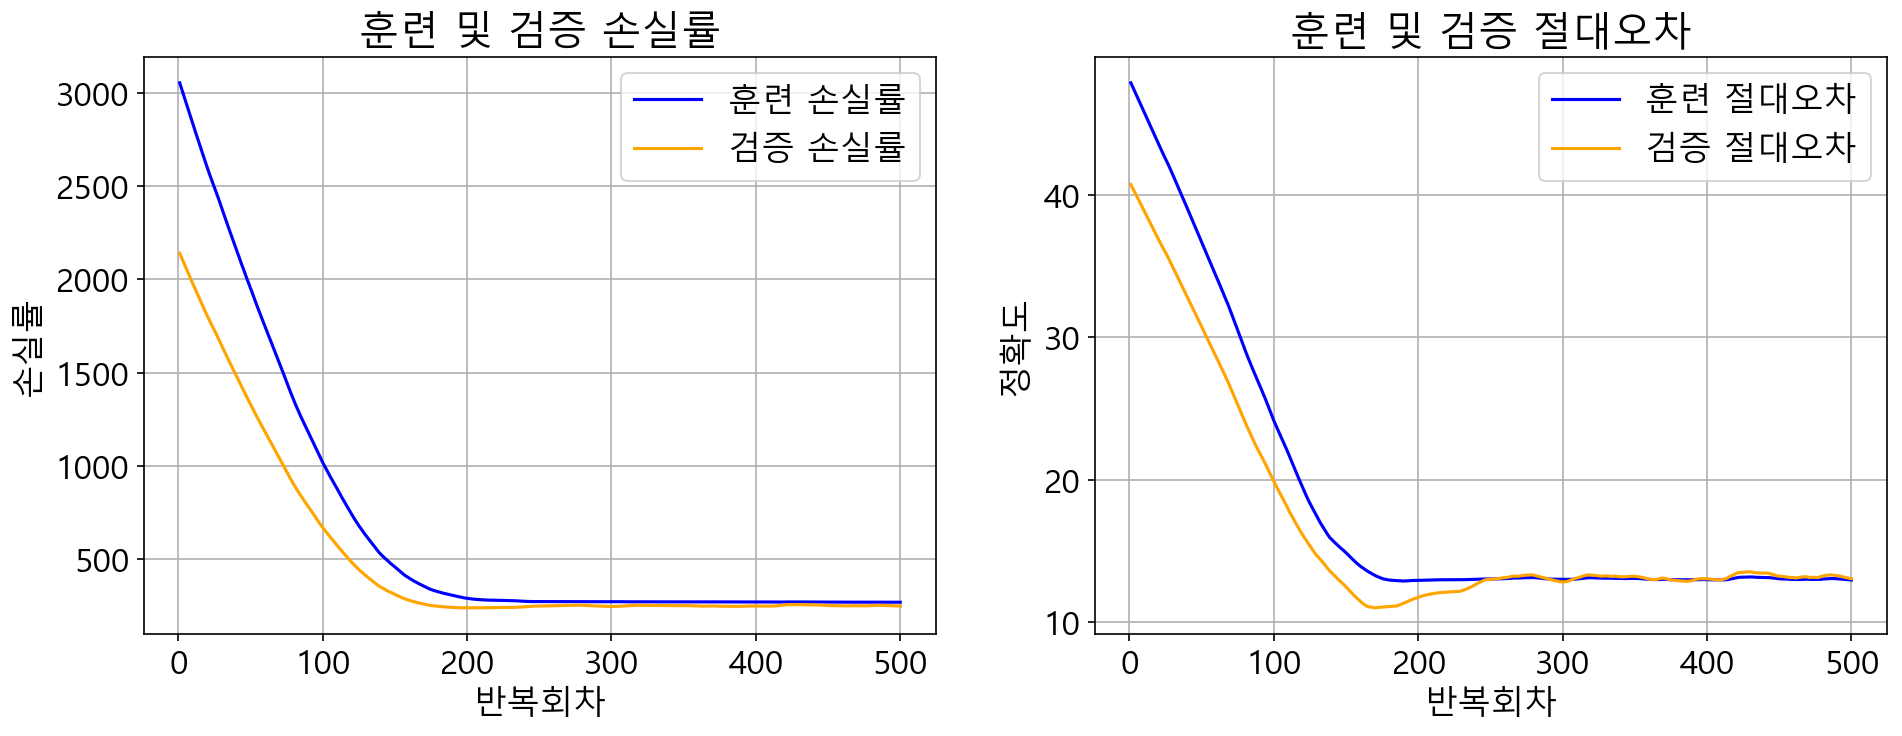

In [11]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 2. 모델 성능 평가

In [12]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 5ms/step - loss: 270.5496 - mae: 12.9533
최종 훈련 손실률: 270.549591, 최종 훈련 절대오차: 12.953333
1/1 [==============================] - 0s 24ms/step - loss: 250.2002 - mae: 13.0585
최종 검증 손실률: 250.200195, 최종 검증 절대오차: 13.058458


## #08. 학습 결과 적용

### 1. 테스트 데이터에 대한 예측 결과 산정

In [13]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 83ms/step
[[67.40003 ]
 [38.663723]
 [35.79009 ]
 [32.91646 ]
 [55.905506]
 [41.53735 ]
 [41.53735 ]
 [53.03188 ]
 [35.79009 ]
 [55.905506]
 [41.53735 ]
 [58.779133]
 [21.421936]
 [38.663723]
 [12.801043]]


### 2. 결과 데이터 셋 구성

In [14]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,67.400032,-13.400032
17,13,34,38.663723,-4.663723
11,12,14,35.790089,-21.790089
9,11,17,32.916458,-15.916458
36,19,46,55.905506,-9.905506
21,14,60,41.537350,18.462650
22,14,80,41.537350,38.462650
31,18,42,53.031879,-11.031879
12,12,20,35.790089,-15.790089
37,19,68,55.905506,12.094494


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

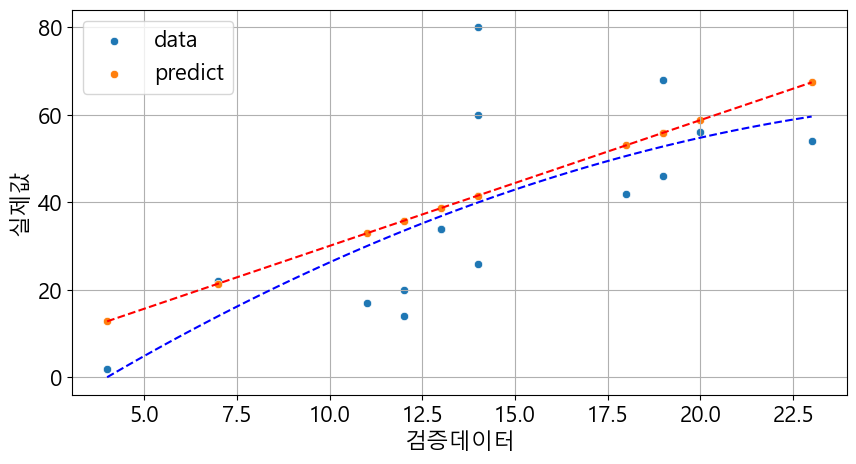

In [15]:
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

### 3. 임의의 값에 대한 머신러닝 예측 결과

In [16]:
my_speed = 50
results = model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 62ms/step
속도가 50인 자동차의 제동거리는 144로 예상됩니다.
